# 1. Import libraries

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import ETFs as etfs

# 2. Read assets from csv file

In [8]:
data = pd.read_csv('../../dataProcessing/assets_filled.csv', parse_dates=['Date'])
data.set_index('Date', inplace=True)
display(data)


,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,21.902443,6.246624,40.000000,42.619999,26.042212,22.380077,42.757008,12.307330,20.625574,14.720881,...,28.830000,100.450684,83.888573,317.519989,69.905655,42.300957,27.664722,34.591938,33.707809,6.78375
2012-01-04,21.902443,6.246624,40.000000,42.509998,26.165096,22.380077,42.757008,12.452251,20.587934,14.581520,...,28.389999,100.608261,82.891136,318.160004,70.114944,42.300957,27.328695,34.000530,33.888020,6.69750
2012-01-05,21.902443,6.246624,40.000000,41.509998,25.814005,22.380077,42.757008,12.290605,20.459967,14.412823,...,28.510000,100.876129,82.743668,313.359985,69.817871,42.300957,26.831099,34.319885,33.472149,6.68250
2012-01-06,21.902443,6.246624,40.000000,41.349998,25.919331,22.380077,42.757008,12.128960,20.249193,14.148770,...,27.910000,100.616127,83.396919,313.760010,69.392532,42.300957,26.462753,34.207520,33.070118,6.72625
2012-01-09,21.902443,6.246624,40.000000,42.189999,25.831558,22.380077,42.757008,12.167979,20.309414,14.207450,...,28.129999,100.860359,83.249390,312.640015,69.655830,42.300957,26.663073,34.089233,33.097832,6.69625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,38.276001,10.405000,100.550003,18.930000,14.140000,107.930000,56.490002,23.700001,41.509998,38.029999,...,29.959999,574.080017,88.790054,74.879997,129.030991,140.270004,71.730003,90.728004,74.690002,8.28750
2025-03-25,38.380001,10.440000,100.720001,18.770000,14.030000,107.330002,56.580002,23.809999,41.709999,38.380001,...,30.580000,575.460022,88.780167,74.820000,129.460007,140.479996,72.160004,89.709999,75.089996,8.14875
2025-03-26,37.854000,10.400000,98.169998,18.559999,14.110000,105.839996,56.080002,23.709999,41.380001,37.560001,...,30.530001,568.590027,88.196609,75.419998,130.250000,139.595001,71.139999,90.059998,74.410004,8.14500


In [9]:
binary_targets = pd.read_csv('../../dataProcessing/target_binary.csv', parse_dates=['Date'])
binary_targets.set_index('Date', inplace=True)

# 3. Create rolling windows

In [10]:
def create_X_y(data,target_label, window_size):
    X, y, labels, first_prices = [], [], [], []
    print(len(data), window_size)
    for i in range(len(data) - window_size):
        window = data.iloc[i : i + window_size]
        first_value = window.iloc[0]
        normalized_window = window / first_value
        X.append(normalized_window.values.flatten()) 


        y_target = data.iloc[i + window_size]/ first_value
        y.append(y_target.values) 
        
        l = target_label.iloc[i+window_size]
        labels.append(l)
        
        first_prices.append(first_value)
        
    X = np.array(X)
    y = np.array(y)
    first_prices = np.array(first_prices)
    labels = np.array(labels)
        
    return X, y, first_prices, labels





In [11]:
window_size = 30
dataset_size = len(data)
train_size = int(dataset_size * 0.8)
test_size = 30 + window_size
val_size = dataset_size - train_size - test_size

train_data = data.iloc[:train_size]
val_data = data.iloc[train_size:train_size + val_size]
test_data = data.iloc[train_size + val_size:]

binary_targets_train = binary_targets.iloc[:train_size]
binary_targets_val = binary_targets.iloc[train_size:train_size + val_size]
binary_targets_test = binary_targets.iloc[train_size + val_size:]


X_train, y_train, first_values_train, labels_train = create_X_y(train_data, binary_targets_train, window_size)
X_val, y_val, first_values_val, labels_val = create_X_y(val_data, binary_targets_val, window_size)
X_test, y_test, first_values_test, labels_test = create_X_y(test_data, binary_targets_test, window_size)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape, labels_train.shape, labels_val.shape, labels_test.shape

2726 30
622 30
60 30


((2696, 990),
 (2696, 33),
 (592, 990),
 (592, 33),
 (30, 990),
 (30, 33),
 (2696, 33),
 (592, 33),
 (30, 33))

In [12]:
rf = MultiOutputRegressor(
    RandomForestRegressor(
        random_state=42,
        criterion='squared_error',
        n_estimators=100,
        max_depth=10,
        min_samples_split=2,
        n_jobs=-1,
    ))

rf.fit(X_train, y_train)

,estimator,RandomForestR...ndom_state=42)
,n_jobs,None
,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0


In [13]:
Y_pred = rf.predict(X_test)
Y_pred_denorm = Y_pred * first_values_test

predicted_prices = pd.DataFrame(Y_pred_denorm, index=data.index[-len(Y_pred):], columns=data.columns)
predicted_prices.index = data.index[-len(predicted_prices):]
# predicted_prices["SPY"].plot()

In [14]:
# SUMMARY
y_test_denorm = y_test * first_values_test


mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)
rmse = np.sqrt(mse)


# print(f"Mean Absolute Error for not normalized: {mae:.4f}" )
print("Mean Squared Error for not normalized:", mse)
# print("Root Mean Squared Error for not normalized:", rmse)
print("R² Score not normalized:", r2)

r2_denorm = r2_score(y_test_denorm, Y_pred_denorm)
mse_denorm = mean_squared_error(y_test_denorm, Y_pred_denorm)
print("=====================")
print("Mean Squared Error:", mse_denorm)
print("R² Score:", r2)



Mean Squared Error for not normalized: 0.00017480148796058365
R² Score not normalized: 0.8080073801098266
Mean Squared Error: 2.683403203084275
R² Score: 0.8080073801098266


In [15]:
display(labels_test)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
       [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0

In [16]:
data

,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,21.902443,6.246624,40.000000,42.619999,26.042212,22.380077,42.757008,12.307330,20.625574,14.720881,...,28.830000,100.450684,83.888573,317.519989,69.905655,42.300957,27.664722,34.591938,33.707809,6.78375
2012-01-04,21.902443,6.246624,40.000000,42.509998,26.165096,22.380077,42.757008,12.452251,20.587934,14.581520,...,28.389999,100.608261,82.891136,318.160004,70.114944,42.300957,27.328695,34.000530,33.888020,6.69750
2012-01-05,21.902443,6.246624,40.000000,41.509998,25.814005,22.380077,42.757008,12.290605,20.459967,14.412823,...,28.510000,100.876129,82.743668,313.359985,69.817871,42.300957,26.831099,34.319885,33.472149,6.68250
2012-01-06,21.902443,6.246624,40.000000,41.349998,25.919331,22.380077,42.757008,12.128960,20.249193,14.148770,...,27.910000,100.616127,83.396919,313.760010,69.392532,42.300957,26.462753,34.207520,33.070118,6.72625
2012-01-09,21.902443,6.246624,40.000000,42.189999,25.831558,22.380077,42.757008,12.167979,20.309414,14.207450,...,28.129999,100.860359,83.249390,312.640015,69.655830,42.300957,26.663073,34.089233,33.097832,6.69625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,38.276001,10.405000,100.550003,18.930000,14.140000,107.930000,56.490002,23.700001,41.509998,38.029999,...,29.959999,574.080017,88.790054,74.879997,129.030991,140.270004,71.730003,90.728004,74.690002,8.28750
2025-03-25,38.380001,10.440000,100.720001,18.770000,14.030000,107.330002,56.580002,23.809999,41.709999,38.380001,...,30.580000,575.460022,88.780167,74.820000,129.460007,140.479996,72.160004,89.709999,75.089996,8.14875
2025-03-26,37.854000,10.400000,98.169998,18.559999,14.110000,105.839996,56.080002,23.709999,41.380001,37.560001,...,30.530001,568.590027,88.196609,75.419998,130.250000,139.595001,71.139999,90.059998,74.410004,8.14500


In [17]:
predicted_prices

,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2025-02-17,42.186121,10.479695,115.741783,20.448159,14.347917,107.204448,57.032397,25.448486,42.135832,36.174293,...,29.276834,607.516582,88.035722,76.239100,126.084922,149.135737,69.580025,90.447703,74.040202,7.643941
2025-02-18,42.205681,10.416542,115.017608,20.394880,14.267052,107.379815,56.922922,25.466532,42.198214,36.323423,...,29.322442,608.606884,87.895987,75.840471,126.037875,149.115445,69.542802,90.836648,74.151179,7.674739
2025-02-19,42.311250,10.365517,116.124828,20.646342,14.613712,109.371953,57.297738,25.466791,42.486265,36.628497,...,29.810134,610.544016,86.780377,76.978546,127.268599,148.876132,69.651557,91.108182,74.706732,7.709214
2025-02-20,42.225826,10.434268,115.877848,20.726450,14.656159,109.654272,57.325790,25.065911,42.199268,36.084629,...,29.873519,610.782541,86.784536,77.269050,127.583342,148.746089,69.459217,91.140646,74.151432,7.690927
2025-02-21,41.650358,10.439614,114.441844,20.513228,14.576721,109.334010,57.823718,25.060549,42.270449,36.078912,...,29.790163,607.599666,87.572666,77.240474,129.175040,148.448101,69.824458,91.678367,74.935467,7.769702
2025-02-24,40.579814,10.636587,112.659580,20.248191,14.228577,110.702358,57.164624,24.543513,41.670713,36.033671,...,29.871522,595.353732,88.217782,74.891195,125.590097,147.368689,69.848668,90.734467,73.844211,7.801070
2025-02-25,40.293534,10.439382,107.049447,20.080888,14.208631,111.825126,56.766530,24.648679,41.414237,36.157765,...,29.388470,596.865356,88.575198,75.142016,126.851405,145.387776,69.306159,90.869490,73.517090,7.812603
2025-02-26,39.994909,10.442586,102.120626,19.881192,14.026660,113.015134,56.416643,24.526221,41.243069,36.498006,...,28.801089,590.486236,89.964400,74.431211,123.983695,142.898065,69.993473,92.287117,74.235920,7.817136
2025-02-27,40.365532,10.541731,101.682825,19.931441,14.023932,112.667907,56.690047,24.515420,41.606812,36.630525,...,28.912241,592.954955,90.452703,74.370573,123.641345,146.076835,70.393249,91.809421,74.077434,7.950524


In [18]:
index_series = data.index[train_size + val_size + window_size:]

y_test_shift = data[train_size + val_size + window_size - 1: -1]
y_test_shift_index = data.index[train_size + val_size + window_size-1: -1]

y_test_shift_df = pd.DataFrame(y_test_shift, index=y_test_shift_index, columns=data.columns)
y_test_shift_array = y_test_shift_df.values


predicted_directions = (Y_pred_denorm > y_test_shift_array).astype(int)
predicted_directions_df = pd.DataFrame(predicted_directions, index=index_series, columns=data.columns)
display(predicted_directions_df)


,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2025-02-17,0,1,1,1,1,1,0,0,0,0,...,0,0,1,1,1,1,0,0,0,1
2025-02-18,0,0,1,1,0,1,0,0,1,0,...,1,1,0,1,1,1,0,1,1,1
2025-02-19,0,1,1,1,1,1,0,1,1,0,...,0,1,0,1,1,1,0,1,1,1
2025-02-20,0,1,1,1,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2025-02-21,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,1,0,1,1,1
2025-02-24,0,0,0,1,1,1,1,0,1,1,...,1,0,0,0,0,0,1,1,1,0
2025-02-25,0,1,0,1,0,1,1,1,1,1,...,0,1,0,0,1,0,0,0,0,0
2025-02-26,1,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2025-02-27,1,1,0,1,1,0,1,1,1,0,...,0,1,0,1,1,1,0,1,1,0


In [19]:
from sklearn.metrics import accuracy_score

actual_flat = labels_test.flatten()
predicted_flat = predicted_directions_df.to_numpy().flatten()

accuracy = accuracy_score(actual_flat, predicted_flat)

print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.5182


In [20]:
y_test_denorm.shape

(30, 33)

y_test_denorm shape: (30, 33)


,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2025-02-17,42.186121,10.479695,115.741783,20.448159,14.347917,107.204448,57.032397,25.448486,42.135832,36.174293,...,29.276834,607.516582,88.035722,76.239100,126.084922,149.135737,69.580025,90.447703,74.040202,7.643941
2025-02-18,42.205681,10.416542,115.017608,20.394880,14.267052,107.379815,56.922922,25.466532,42.198214,36.323423,...,29.322442,608.606884,87.895987,75.840471,126.037875,149.115445,69.542802,90.836648,74.151179,7.674739
2025-02-19,42.311250,10.365517,116.124828,20.646342,14.613712,109.371953,57.297738,25.466791,42.486265,36.628497,...,29.810134,610.544016,86.780377,76.978546,127.268599,148.876132,69.651557,91.108182,74.706732,7.709214
2025-02-20,42.225826,10.434268,115.877848,20.726450,14.656159,109.654272,57.325790,25.065911,42.199268,36.084629,...,29.873519,610.782541,86.784536,77.269050,127.583342,148.746089,69.459217,91.140646,74.151432,7.690927
2025-02-21,41.650358,10.439614,114.441844,20.513228,14.576721,109.334010,57.823718,25.060549,42.270449,36.078912,...,29.790163,607.599666,87.572666,77.240474,129.175040,148.448101,69.824458,91.678367,74.935467,7.769702
2025-02-24,40.579814,10.636587,112.659580,20.248191,14.228577,110.702358,57.164624,24.543513,41.670713,36.033671,...,29.871522,595.353732,88.217782,74.891195,125.590097,147.368689,69.848668,90.734467,73.844211,7.801070
2025-02-25,40.293534,10.439382,107.049447,20.080888,14.208631,111.825126,56.766530,24.648679,41.414237,36.157765,...,29.388470,596.865356,88.575198,75.142016,126.851405,145.387776,69.306159,90.869490,73.517090,7.812603
2025-02-26,39.994909,10.442586,102.120626,19.881192,14.026660,113.015134,56.416643,24.526221,41.243069,36.498006,...,28.801089,590.486236,89.964400,74.431211,123.983695,142.898065,69.993473,92.287117,74.235920,7.817136
2025-02-27,40.365532,10.541731,101.682825,19.931441,14.023932,112.667907,56.690047,24.515420,41.606812,36.630525,...,28.912241,592.954955,90.452703,74.370573,123.641345,146.076835,70.393249,91.809421,74.077434,7.950524


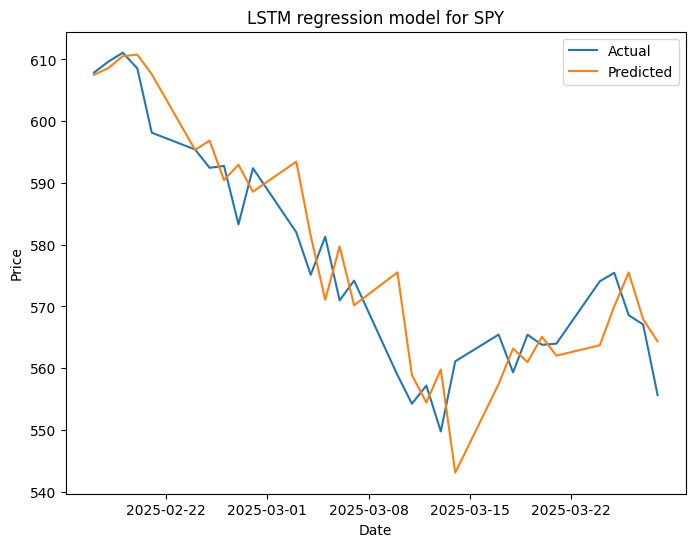

In [21]:
y_test_denorm = y_test * first_values_test
print(f"y_test_denorm shape: {y_test_denorm.shape}")
y_test_denorm= y_test_denorm[-test_size:]
y_actual = pd.DataFrame(y_test_denorm, index=data.index[-test_size+window_size::], columns=data.columns)
display(predicted_prices)
ticker_name = 'SPY'

plt.figure(figsize=(8,6))
plt.plot(y_actual[ticker_name], label='Actual')
plt.plot(predicted_prices[ticker_name], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'LSTM regression model for {ticker_name}')
plt.legend()
plt.show()


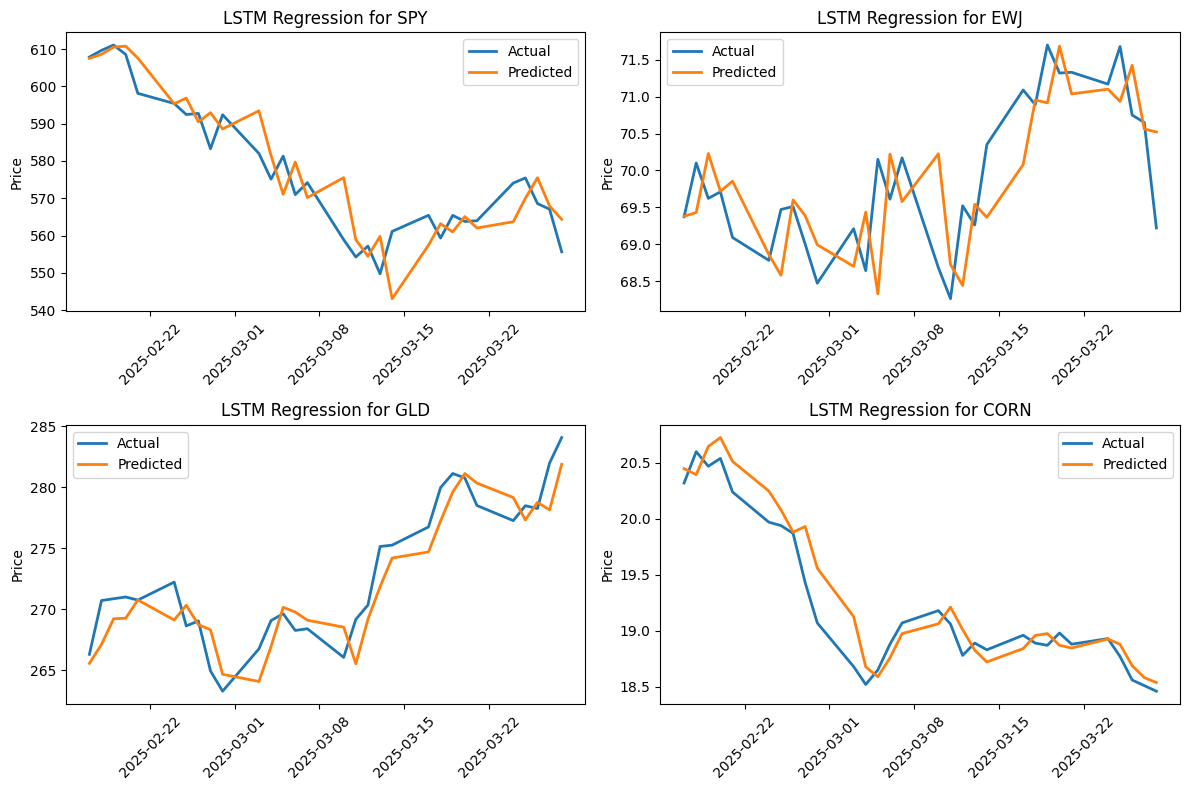

In [22]:
ticker_name = ['SPY', 'EWJ', 'GLD', 'CORN'] 
num_plots = len(ticker_name)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axes = axes.flatten()  

for i, ticker in enumerate(ticker_name):
    ax = axes[i]
    ax.plot(y_actual[ticker], label='Actual', linewidth=2)
    ax.plot(predicted_prices[ticker], label='Predicted', linewidth=2)
    ax.set_title(f'LSTM Regression for {ticker}')
    ax.set_ylabel('Price')
    ax.tick_params(axis='x', rotation=45)

    ax.legend()

for j in range(len(ticker_name), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [23]:
yesterday_prices = data.iloc[-2]  # second last row 

today_prices_actual = data.iloc[-1] # last row

today_prices_predicted = predicted_prices.mean(axis=0)  

comparison_df = pd.DataFrame({
    'Yesterday_actual': yesterday_prices,
    'Today_actual': today_prices_actual,
    'Today_pred': today_prices_predicted,
})

tickers_names = data.columns

correct_list = []
for ticker in tickers_names:
    yesterday = yesterday_prices[ticker]
    actual_today = today_prices_actual[ticker]
    predicted = today_prices_predicted[ticker]

    sign_actual = np.sign(actual_today - yesterday)
    sign_pred = np.sign(predicted - yesterday)

    if sign_actual == sign_pred:
        correct_list.append(1)
    else:
        correct_list.append(0)
comparison_df['Correct'] = correct_list

count_of_ones = correct_list.count(1)
print(f"Count of correct predictions: {count_of_ones}")
print(f"accuracy: {count_of_ones / len(correct_list)}")
display(comparison_df)

Count of correct predictions: 19
accuracy: 0.5757575757575758


,Yesterday_actual,Today_actual,Today_pred,Correct
AIEQ,37.658001,36.845001,38.809627,0
ASHR.L,10.460000,10.340000,10.458425,1
BCHN.L,97.080002,92.714996,101.811479,0
CORN,18.510000,18.459999,19.316364,0
DBO,14.130000,13.970000,13.961146,1
EDEN,105.330002,105.169998,110.021525,0
EMXC,56.110001,55.180000,55.990706,1
EWA,23.750000,23.469999,24.112193,0
EWC,41.250000,40.570000,41.013827,1
EWG,37.590000,37.389999,37.426798,1
